# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [3]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

def vectorize_seq(seqs, dim = 10000):
    results = np.zeros((len(seqs), dim))
    for i , seq in enumerate(seqs):
        results[i, seq] = 1.
        
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2가지의 모델 설정

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
model_1 = Sequential([Dense(16, activation = 'relu', input_shape = (10000, ), name = 'input'),
                     Dense(16, activation = 'relu', name = 'hidden'),
                     Dense(1, activation = 'sigmoid', name = 'output')])

In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_2 = Sequential([Dense(7, activation = 'relu', input_shape = (10000, ), name = 'input2'),
                     Dense(7, activation = 'relu', name = 'hidden2'),
                     Dense(1, activation = 'sigmoid', name = 'output2')])

In [8]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 7)                 70007     
_________________________________________________________________
hidden2 (Dense)              (None, 7)                 56        
_________________________________________________________________
output2 (Dense)              (None, 1)                 8         
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 컴파일
## 차이는 모델의 크기가 다르다! (Trainable params의 수가 다르다)
model_1.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc'])

model_2.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc'])

#### 2개의 모델 학습

In [10]:
model_1_hist = model_1.fit(x_train, y_train, epochs = 20, batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 41ms/step - loss: 0.4522 - acc: 0.8213 - val_loss: 0.3448 - val_acc: 0.8740
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2618 - acc: 0.9097 - val_loss: 0.2985 - val_acc: 0.8804
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2029 - acc: 0.9283 - val_loss: 0.2802 - val_acc: 0.8877
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1689 - acc: 0.9406 - val_loss: 0.2906 - val_acc: 0.8843
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1464 - acc: 0.9494 - val_loss: 0.3174 - val_acc: 0.8782
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1283 - acc: 0.9555 - val_loss: 0.3288 - val_acc: 0.8762
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1163 - acc: 0.9604 - val_loss: 0.3505 - val_acc: 0.8734
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1004 - a

In [11]:
model_2_hist = model_1.fit(x_train, y_train, epochs = 20, batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 39ms/step - loss: 0.0191 - acc: 0.9946 - val_loss: 0.8105 - val_acc: 0.8492
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0117 - acc: 0.9979 - val_loss: 0.8953 - val_acc: 0.8437
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0117 - acc: 0.9980 - val_loss: 0.8990 - val_acc: 0.8468
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.0120 - acc: 0.9970 - val_loss: 0.9464 - val_acc: 0.8442
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0101 - acc: 0.9976 - val_loss: 0.9791 - val_acc: 0.8439
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0090 - acc: 0.9976 - val_loss: 1.0129 - val_acc: 0.8445
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0069 - acc: 0.9987 - val_loss: 1.0507 - val_acc: 0.8439
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.0067 - a

#### 비교

In [12]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

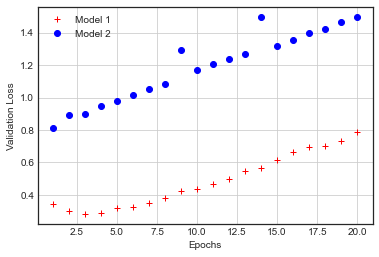

In [14]:
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label = 'Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 모델의 크기 축소 (2)

#### 모델 구성

In [15]:
model_3 = Sequential([Dense(1024, activation = 'relu', input_shape = (10000, ), name = 'input3'),
                     Dense(1024, activation = 'relu', name = 'hidden3'),
                     Dense(1, activation = 'sigmoid', name = 'output3')])

model_3.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 1024)              10241024  
_________________________________________________________________
hidden3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
output3 (Dense)              (None, 1)                 1025      
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [16]:
model_3_hist = model_3.fit(x_train, y_train, epochs = 20, batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.5203 - acc: 0.7850 - val_loss: 0.3066 - val_acc: 0.8870
Epoch 2/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2232 - acc: 0.9130 - val_loss: 0.2790 - val_acc: 0.8849
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1272 - acc: 0.9549 - val_loss: 0.6244 - val_acc: 0.8076
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0609 - acc: 0.9814 - val_loss: 0.4528 - val_acc: 0.8820
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1156 - acc: 0.9870 - val_loss: 0.5050 - val_acc: 0.8813
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 5.4951e-04 - acc: 1.0000 - val_loss: 0.7188 - val_acc: 0.8806
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 4.1899e-05 - acc: 1.0000 - val_loss: 0.8898 - val_acc: 0.8815
Epoch 8/20
49/49 [==============================] - 1s 27ms/step - loss: 3.

#### 시각화

In [19]:
model_3_val_loss = model_3_hist.history['val_loss']

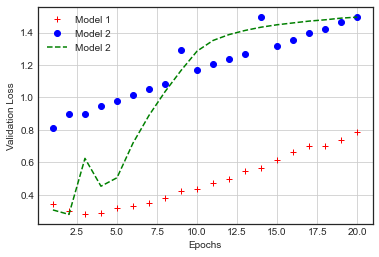

In [20]:
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label = 'Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label = 'Model 2')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

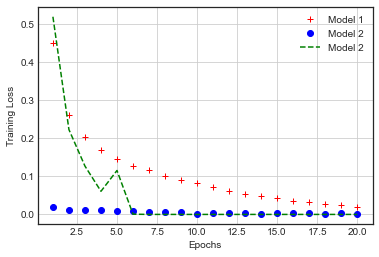

In [21]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']


plt.plot(epochs, model_1_train_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label = 'Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label = 'Model 2')

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [22]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential([Dense(30, kernel_initializer = 'he_normal', input_shape = [10, 10]),
                         LeakyReLU(alpha = 0.2),
                         Dense(1, kernel_initializer = 'he_normal'),
                         Activation('softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 30)            330       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10, 30)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             31        
_________________________________________________________________
activation (Activation)      (None, 10, 1)             0         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

#### 모델 구성

#### 모델 학습

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

#### L1과 비교

3가지 모델 비교
- Original
- L1
- L2

#### L1, L2와 비교

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

#### 모델 구성

#### 모델 학습

#### 시각화